# STA 220: Midterm

### Worth 200 Points

Winter 2020

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: **Chenghan**

Last Name: **Sun**

Student ID: **915030521**

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

In [1]:
import pandas as pd
import numpy as np
import sys
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [2]:
#1 Read in the Trans-Atlantic Slave Trade database with Pandas
data_path = './tastdb-2010.csv'
df_tast = pd.read_csv(data_path, encoding='iso-8859-1', na_values=' ', low_memory=False)
df_tast.head(5)

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,6.0,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check data dimensions
print(f'TAST text file: rows of the dataset = {df_tast.shape[0]}; number of variables = {df_tast.shape[1]}')
df_tast.columns # check all the variables

TAST text file: rows of the dataset = 34941; number of variables = 98


Index(['voyageid', 'evgreen', 'shipname', 'national', 'natinimp', 'placcons',
       'yrcons', 'placreg', 'yrreg', 'rig', 'tonnage', 'tonmod', 'guns',
       'ownera', 'ownerb', 'ownerc', 'ownerd', 'ownere', 'ownerf', 'ownerg',
       'ownerh', 'owneri', 'ownerj', 'ownerk', 'ownerl', 'ownerm', 'ownern',
       'ownero', 'ownerp', 'fate', 'fate2', 'fate3', 'fate4', 'resistance',
       'ptdepimp', 'plac1tra', 'plac2tra', 'plac3tra', 'mjbyptimp', 'npafttra',
       'sla1port', 'adpsale1', 'adpsale2', 'mjslptimp', 'portret', 'yearam',
       'Date_dep', 'Date_buy', 'Date_leftAfr', 'Date_land1', 'Date_depam',
       'Date_end', 'voy1imp', 'voy2imp', 'captaina', 'captainb', 'captainc',
       'crew1', 'crew3', 'crewdied', 'slintend', 'ncar13', 'ncar15', 'ncar17',
       'tslavesd', 'slaximp', 'slaarriv', 'slas32', 'slas36', 'slas39',
       'slamimp', 'menrat7', 'womrat7', 'boyrat7', 'girlrat7', 'malrat7',
       'chilrat7', 'jamcaspr', 'vymrtimp', 'vymrtrat', 'sourcea', 'sourceb',
       '

Noticed the existance of some imputed variables, I decided to drop them as they would have no benefits for later data analysis (besides Exercise 6, I'm asked to use a imputed variable).

    For these imputed variables, some of them were titled with 'imp' as last three characters:  
        natinimp: Imputed country in which ship registered  
        ptdepimp: Imputed port where voyage began  
        mjbyptimp: Imputed principal place of slave purchase  
        mjslptimp: Imputed principal port of slave disembarkation  
        voy1imp: Voyage length from home port to disembarkation (days)  
        voy2imp: Voyage length from leaving Africa to disembarkation (days)  
        slaximp: Imputed total slaves embarked  
        slamimp: Imputed total slaves disembarked  
        vymrtimp: Imputed slave deaths during Middle Passage  
        
    Other imputed variables used special names:  
        tonmod: Tonnage standardized on British measured tons, 1773-1835  
        fate2: Outcome of voyage for slaves  
        fate3: Outcome of voyage if vessel captured  
        fate4: Outcome of voyage for owner  
        yearam: Year of arrival at port of disembarkation (imputed)  
        menrat7: Percentage of men at departure or arrival  
        womrat7: Percentage of women at departure or arrival  
        boyrat7: Percentage of boys at departure or arrival  
        girlrat7: Percentage of girls at departure or arrival  
        malrat7: Male ratio at departure or arrival  
        chilrat7: Child ratio at departure or arrival  
        jamcaspr: Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica  
        vymrtrat: Slave mortality rate (slave deaths / slaves embarked)

In [4]:
imp_var_index = [i for i, var in enumerate(df_tast.columns) if 'imp' == var[-3:]]
rat7_var_index = [i for i, var in enumerate(df_tast.columns) if 'rat7' == var[-4:]]
other_var_index = [i for i, var in enumerate(df_tast.columns) if 'tonmod' == var[-6:] or 'ate2' == var[-4:] 
                   or 'ate3' == var[-4:] or 'ate4' == var[-4:] or 'yearam' == var[-6:] 
                   or 'yearam' == var[-6:] or 'yearam' == var[-6:] or 'jamcaspr' == var[-8:] 
                   or 'vymrtrat' == var[-8:]]
joint_imp_var_index = imp_var_index + rat7_var_index + other_var_index
# print(joint_imp_var_index)
# print(len(joint_imp_var_index))
df_tast_noimp = df_tast.drop(df_tast.columns[joint_imp_var_index], axis=1) # drop imputed variables
# print(len(df_tast_noimp.columns))
df_tast_noimp.columns

Index(['voyageid', 'evgreen', 'shipname', 'national', 'placcons', 'yrcons',
       'placreg', 'yrreg', 'rig', 'tonnage', 'guns', 'ownera', 'ownerb',
       'ownerc', 'ownerd', 'ownere', 'ownerf', 'ownerg', 'ownerh', 'owneri',
       'ownerj', 'ownerk', 'ownerl', 'ownerm', 'ownern', 'ownero', 'ownerp',
       'fate', 'resistance', 'plac1tra', 'plac2tra', 'plac3tra', 'npafttra',
       'sla1port', 'adpsale1', 'adpsale2', 'portret', 'Date_dep', 'Date_buy',
       'Date_leftAfr', 'Date_land1', 'Date_depam', 'Date_end', 'captaina',
       'captainb', 'captainc', 'crew1', 'crew3', 'crewdied', 'slintend',
       'ncar13', 'ncar15', 'ncar17', 'tslavesd', 'slaarriv', 'slas32',
       'slas36', 'slas39', 'sourcea', 'sourceb', 'sourcec', 'sourced',
       'sourcee', 'sourcef', 'sourceg', 'sourceh', 'sourcei', 'sourcej',
       'sourcek', 'sourcel', 'sourcem', 'sourcen', 'sourceo', 'sourcep',
       'sourceq', 'sourcer'],
      dtype='object')

**Part 2: List of variables**:


1. Technical variables:    
    voyageid: Voyage identification number  
    evgreen: Voyage in 1999 CD-ROM


2. Data variables  
    shipname: Name of vessel  
    national: Country in which ship registered  
    placcons: Place where vessel constructed  
    yrcons: Year of vessel’s construction  
    placreg: Place where vessel registered  
    yrreg: Year of vessel’s registration  
    rig: Rig of vessel  
    tonnage: Tonnage of vessel  
    guns: Guns mounted  
    ownera, ownerb, ownerc, ownerd, ownere, ownerf, ownerg, ownerh,owneri, ownerj, ownerk, ownerl, ownerm, ownern, ownero, ownerp: first to sixteenth owner of venture  
    fate: Particular outcome of voyage  
    resistance: African resistance  
    plac1tra, plac2tra, plac3tra: First to third place of slave purchase  
    npafttra: Port of call before Atlantic crossing  
    sla1port, adpsale1, adpsale2: First to third place of slave landing  
    portret: Place at which voyage ended  
    Date_dep: Date that voyage began  
    Date_buy: Date that slave purchase began  
    Date_leftAfr: Date that vessel left last slaving port  
    Date_land1: Date that slaves landed at first place  
    Date_depam: Date ship left on return voyage  
    Date_end: Date when voyage completed  
    captaina, captainb, captainc: First to third captain’s name  
    crew1: Crew at voyage outset  
    crew3: Crew at first landing of slaves  
    crewdied: Crew died during complete voyage  
    slintend: Slaves intended from first port of purchase  
    ncar13, ncar15, ncar17: Slaves carried from first to third port of purchase  
    tslavesd: Total slaves on board at departure from last slaving port  
    slaarriv: Total slaves arrived at first port of disembarkation  
    slas32, slas36, slas39: Slaves disembarked at first to third place  
    sourcea, sourceb, sourcec, sourced, sourcee, sourcef, sourceg, sourceh, sourcei, sourcej, sourcek, sourcel, sourcem, sourcen, sourceo, sourcep, sourceq, sourcer: First to eighteenth source of information  
    

**Exercise 2.** Estimating the total number of captives.

1. We will try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  You can simply divide the total count for the non-missing entries by the proportion of non-missing entries.  
3. What other variables do you expect to be associated with Var A and why, select 2 top possibilities?  Visualize these associations using an appropriate plot.  Do you trust the answer to 2.2?  Why or why not?

**Part 1:** I choose to use variable `tslavesd` as estimation for the total number of captives taken from Africa, as it describes the "total slaves on board at departure from last slaving port".

In [5]:
var_A = 'tslavesd'
df_tast[var_A].isnull().sum()

26734

In [6]:
# Part 2
num_tslavesd = df_tast[var_A].sum()
portion = (df_tast.shape[0] - df_tast[var_A].isnull().sum()) / df_tast.shape[0]
num_tslavesd / portion

11569160.328337599

From the estimation above, the initial estimate of the total number of captives taken from Africa = **11569160**.

In [7]:
# Part 3
# Create a year variable into the DataFrame 
df_tast_2_year = df_tast_noimp[df_tast_noimp['Date_dep'].notna()]
date_list = df_tast_2_year['Date_dep'].tolist()
year_list = [yr.split('/')[2] for yr in date_list]
year_series = pd.Series(map(int, year_list))  # str to pd.Series
df_tast_2_year = df_tast_2_year.reset_index(drop=True)
df_tast_2_year.loc[:, 'years'] = year_series

In [39]:
# Part 3
# find the correlation between Var_A and all variables 
corr_var_a = df_tast_noimp[df_tast_noimp.columns[:]].corr()[var_A][:]
#corr_var = corr_var_a.index.tolist()
#corr_val = corr_var_a.tolist()
#df_corr_vara = pd.DataFrame(corr_var_a).rename(columns={var_A: 'corr_var_A'})
#df_corr_vara.index.tolist()
corr_var_a

voyageid     -0.125522
evgreen            NaN
national     -0.186564
placcons     -0.016980
yrcons        0.196200
placreg      -0.325114
yrreg         0.146558
rig           0.113026
tonnage       0.540108
guns          0.526388
fate         -0.156838
resistance   -0.077623
plac1tra      0.170587
plac2tra      0.326746
plac3tra      0.297660
npafttra     -0.023067
sla1port      0.246330
adpsale1      0.140201
adpsale2      0.331953
portret      -0.184949
crew1         0.522192
crew3         0.347957
crewdied      0.199745
slintend      0.831760
ncar13        0.810653
ncar15        0.572813
ncar17        0.702715
tslavesd      1.000000
slaarriv      0.937504
slas32        0.783066
slas36        0.623793
slas39        0.629987
Name: tslavesd, dtype: float64

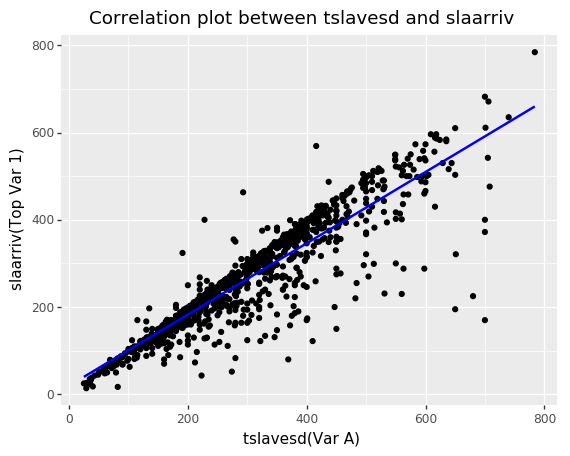

<ggplot: (-9223372036546008309)>

In [55]:
# Plot the top 2 possibilities 
df_top_var_plot = df_tast_noimp[['tslavesd', 'slaarriv', 'slintend']].dropna()
df_top_var_plot = df_top_var_plot.reset_index(drop=True)

(ggplot(df_top_var_plot, aes('tslavesd', 'slaarriv'))
 + geom_point()
 + stat_smooth(mapping=aes('tslavesd', 'slaarriv'), method='lm', color='blue', se = False, inherit_aes=False)
 + labs(x='tslavesd(Var A)', y='slaarriv(Top Var 1)')
 + ggtitle('Correlation plot between tslavesd and slaarriv')
)

From the above plot, 

**Exercise 3.** Hot-deck imputation replaces missing data with similar entries.  We will use a stochastic hot-deck imputation method, which replaces the number captured into slavery (tslavesd) with a random voyage from the same decade.  (If there is only one voyage in that decade then ignore that record.)  Construct a function that performs this random imputation method, and outputs a Series with this new imputed variable.  Calculate the total imputed tslavesd variable 100 times by performing this random imputation method 100 times.  Report the standard error, which is the standard deviation of the total imputed, along with the mean of the 100 trials.

In [10]:
case = df_tast_noimp['Date_dep'].dropna()
case2 = df_tast_noimp['Date_end'].dropna()
case3 = df_tast_noimp['Date_buy'].dropna()
print(case.max())
print(case.min())
print(case2.max())
print(case2.min())
print(case3.max())
print(case3.min())


9/9/1847
1/1/1676
9/9/1804
1/1/1669
9/9/1761
1/1/1710


In [11]:
def hot_deck_imp(df, col_name, new_col_name):
    """ stochastic hot-deck imputation
    replaces the number captured into slavery (tslavesd) with a random voyage from the same decade
    """
    new_var = []
    selectd_df = df[col_name]
    pool = selectd_var.dropna()
    new_df = selectd_df.apply(lambda x: np.random.choice(pool) if np.isnan(x) else x)
    new_var.extend(new_df)
    df[new_col_name] = new_var
    return df

def hot_deck_stat(df):
    """ Report the standard errors
    """
    return None

**Exercise 4.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [12]:
# Part 1 
national_count = df_tast_noimp['national'].value_counts()
national_select = national_count[national_count > 100] # subselect
national_select

7.0     11009
4.0      5303
10.0     4069
9.0      1575
1.0      1249
8.0      1237
5.0       788
11.0      248
Name: national, dtype: int64

In [13]:
# Part 2
national_index = national_select.index.tolist()
df_tast_4 = df_tast_noimp[df_tast_noimp['national'].isin(national_index)] # Create filtered DataFrame
df_tast_4 = df_tast_4.reset_index(drop=True)
print(f'Exercise 4 df: rows of the dataset = {df_tast_4.shape[0]}; number of variables = {df_tast_4.shape[1]}')
df_tast_4.head()

Exercise 4 df: rows of the dataset = 25478; number of variables = 76


,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Part 3
code = {7.0: "Great Britain", 4.0: "Protugal", 10.0: "France", 9.0: "U.S.A.", 
        1.0: "Spain", 8.0: "Netherlands", 5.0: "Brazil", 11.0: "Denmark"} # one-one map of national to flag
decode = [code[i] for i in df_tast_4['national']]
df_tast_4['flag'] = decode
print(f'Exercise 4 df with new flag variable: rows of the dataset = {df_tast_4.shape[0]}; number of variables = {df_tast_4.shape[1]}')
df_tast_4.head()

Exercise 4 df with new flag variable: rows of the dataset = 25478; number of variables = 77


,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
1,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
2,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Protugal
3,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
4,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


In [15]:
# Part 4
# extract voyage years
df_tast_4_vy = df_tast_4[df_tast_4['Date_dep'].notna()]  # create df_tast_4_vy: df_tast_4 with voyage years
v_date_list = df_tast_4_vy['Date_dep'].tolist()  # list of voyage years
vy_list = [yr.split('/')[2] for yr in v_date_list]  # extract exact voyage years
vy_series = pd.Series(map(int, vy_list))  # str to pd.Series

In [16]:
# add new variable into created df_tast_4_vy
df_tast_4_vy = df_tast_4_vy[['national', 'flag']]
df_tast_4_vy = df_tast_4_vy.reset_index(drop=True)
df_tast_4_vy.loc[:, 'voyage_years'] = vy_series
df_tast_4_vy.head()

,national,flag,voyage_years
0,4.0,Protugal,1816
1,4.0,Protugal,1817
2,4.0,Protugal,1818
3,10.0,France,1819
4,10.0,France,1821


In [17]:
# grouping and sort the old df, then create new df for plot 
df_tast_4_vy_g = df_tast_4_vy.groupby(['voyage_years','flag']).count()  # sorted 
yrs_data = df_tast_4_vy_g.index.get_level_values(0)
flag_data = df_tast_4_vy_g.index.get_level_values(1)
num_voyage = df_tast_4_vy_g['national'].values
df_vy_national = pd.DataFrame(data={'yrs_data':yrs_data, 'flag_data':flag_data, 'num_voyage':num_voyage})
df_vy_national.head()

,yrs_data,flag_data,num_voyage
0,1592,Spain,5
1,1594,Protugal,2
2,1595,Protugal,5
3,1596,Protugal,1
4,1616,Protugal,5


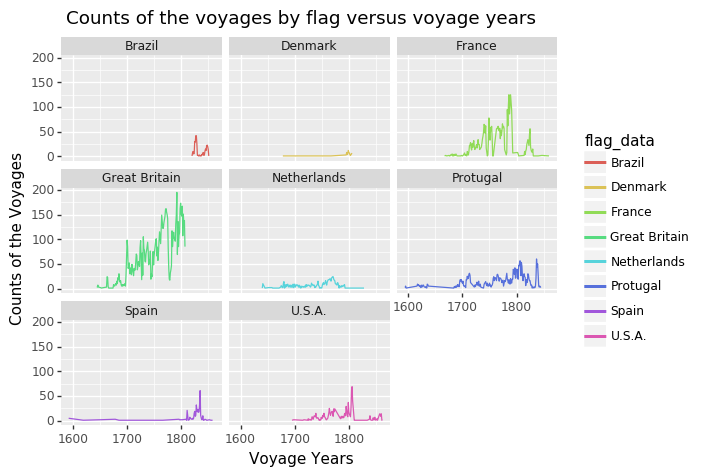

<ggplot: (-9223372036548403477)>

In [18]:
# plot by plotnine
(ggplot(df_vy_national, aes('yrs_data', 'num_voyage', group='flag_data', color='flag_data'))
 + geom_line()
 + facet_wrap('~flag_data')
 + labs(x='Voyage Years', y='Counts of the Voyages')
 + ggtitle('Counts of the voyages by flag versus voyage years')
)

**Part 5:**  

In the above plot, I used `df_vy_national`, which was a newly created DataFrame contained information of voyage years, counts of the voyages, as well as flags indicated each of voyage nations, to make the plot. 

For **geometric elements**:

**1. geometric objects**: `geom_line()` was used to plot the continuous behaviors of variable `num_voyage` versus `yrs_data` for each of the `flag_data`, the eight nations;  
**2. coordinate systems**: `facet_wrap` was used to seperate the whole plot into a 3x3 subplots matrix; a bar of legend was also listed represents different flags.  
**3. annotation for the plot**: for labels, x=`Voyage Years`, y=`Counts of the Voyages` were set for X-Y axises annotation by `labs`; `ggtitle` was used to set figure title as "Counts of the voyages by flag versus voyage years".

For **aesthetic mappings**:

**1. aesthetic elements**: X-position was mapped to voyage years (var: `yrs_data`); Y-position was mapped to Counts of the Voyages(var: `num_voyage`); each of the nation (flag) was assigned with different colors.  
**2. aesthetic mappings**: Group was used by grouping the eight nations (var: `flag_data`), the legend was listed along the figure with different colors.

**Part 6:**



**Exercise 5.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [19]:
# Part 1
# Search for the slave ship named "Brook"
df_tast_5_shipname = df_tast_noimp['shipname'].dropna()  # get the series of shipnames and drop nan
shipname_list = df_tast_5_shipname.tolist()
regex = 'Brook'
shipname_index = [i for i, name in enumerate(shipname_list) if regex in name]
df_tast_5_shipname = df_tast_noimp[df_tast_noimp['shipname'].notna()]
df_tast_5_shipname = df_tast_5_shipname.iloc[shipname_index, :]
df_tast_5_shipname  # show all the shipnames with 'Brook'

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
13038,24910,1.0,Brooke,7.0,10432.0,1737.0,10432.0,1747.0,4.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14199,27151,1.0,Brooke,7.0,10432.0,1737.0,10432.0,1747.0,4.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14341,28044,1.0,Brooke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29530,80657,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,BT6/235,"MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29531,80658,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,"LList, 30 Mar 1802","LList, 16 Apr 1802","LList, 27 Aug 1802","MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN
29532,80659,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,"MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29533,80660,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1804.0,4.0,352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29534,80663,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1781.0,4.0,297.0,...,"LST,1744-1786","Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN
29535,80664,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"LST,1744-1786","Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN
29536,80665,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"PP,1789(629),XXIV","Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN


In [20]:
# based on the wikipedia article, I'm looking for same specific properties associated with these extracted ships
# these variables were applied to the df as below 
df_tast_5_shipinfer = df_tast_5_shipname[['shipname', 'national', 'tslavesd', 'slaarriv', 'guns', 'tonnage', 'rig', 'yrcons']]
# from the article, the launched year of the slave ship is 1781
df_tast_5_shipinfer = df_tast_5_shipinfer[df_tast_5_shipinfer['yrcons']==1781.0]
# from the article, the slave ship image portrays 487 slaves on board
df_tast_5_shipinfer = df_tast_5_shipinfer[df_tast_5_shipinfer['tslavesd']>=487.0]
df_tast_5_shipinfer

,shipname,national,tslavesd,slaarriv,guns,tonnage,rig,yrcons
29534,Brooks,7.0,650.0,646.0,NaN,297.0,4.0,1781.0
29535,Brooks,7.0,619.0,586.0,NaN,297.0,4.0,1781.0
29536,Brooks,7.0,740.0,635.0,NaN,297.0,4.0,1781.0
29537,Brooks (a) Brookes,7.0,609.0,596.0,NaN,297.0,4.0,1781.0


From the article

In [21]:
# Part 2
# Construct resistance-year mapping by using the similar method as Part 4 from Exercise 4
# First create year variable 
df_tast_5_revolt = df_tast_noimp[df_tast_noimp['Date_dep'].notna()]
revolt_date_list = df_tast_5_revolt['Date_dep'].tolist()
revolt_year_list = [yr.split('/')[2] for yr in revolt_date_list]
revolt_year_series = pd.Series(map(int, revolt_year_list))  # str to pd.Series
df_tast_5_revolt = df_tast_5_revolt.reset_index(drop=True)
df_tast_5_revolt.loc[:, 'revolt_years'] = revolt_year_series

# Construct resistance variable: bi_revolt
birevolt_list = df_tast_5_revolt['resistance'].notna()  # use notna() to get binary response of resistance 
birevolt_list = birevolt_list.tolist()
birevolt_series = pd.Series(map(int, birevolt_list)) 
df_tast_5_revolt.loc[:, 'bi_revolt'] = birevolt_series
df_tast_5_revolt.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,revolt_years,bi_revolt
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,0
1,2,1.0,Tibério,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,0
2,3,1.0,Paquete Real,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,0
3,4,1.0,Bom Caminho,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,0
4,8,1.0,Vigilante Africano,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,0


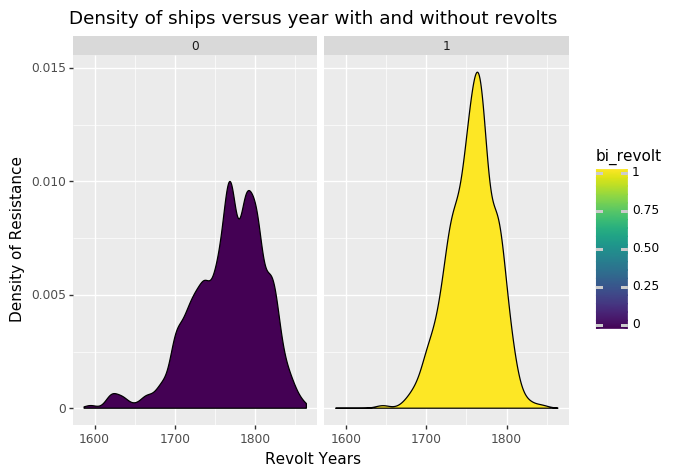

<ggplot: (-9223372036572400710)>

In [22]:
# plot the density distribution
df_tast_5_revolt_plot = df_tast_5_revolt[['revolt_years', 'bi_revolt']]
df_tast_5_revolt_plot_0 = df_tast_5_revolt_plot[df_tast_5_revolt_plot['bi_revolt']==0]
df_tast_5_revolt_plot_1 = df_tast_5_revolt_plot[df_tast_5_revolt_plot['bi_revolt']==1]

(ggplot(df_tast_5_revolt_plot, aes('revolt_years', fill='bi_revolt'))
 + geom_density()
 + facet_wrap('~bi_revolt')
 + labs(x='Revolt Years', y='Density of Resistance')
 + ggtitle('Density of ships versus year with and without revolts')
)

**Plot Description**:

In [23]:
# Part 3
# Similar to Part 1, first search by ship name 
regex = 'Amistad'
shipname_index_2 = [i for i, name in enumerate(shipname_list) if regex in name]
df_tast_5_shipname = df_tast_noimp[df_tast_noimp['shipname'].notna()]
df_tast_5_shipname_2 = df_tast_5_shipname.iloc[shipname_index_2, :]
df_tast_5_shipname_2  # show all the shipnames with 'Amistad'

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
769,774,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,940,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,964,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,1196,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,1224,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,1273,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,1296,1.0,Amistad Habanera,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8225,14622,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8258,14656,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8341,14742,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Second, based on the article, search by the event within 10 years
# Here some of the relavent variables were used to subselect the DataFrame
df_tast_5_shipname_2 = df_tast_5_shipname_2[['shipname', 'national', 'tslavesd', 'Date_dep', 'ownera',
                                             'Date_end', 'slaarriv', 'yrcons', 'resistance', 'rig']]

# Noticed that the article mentioned La Amistad was a two-masted schooner
# In the PDF, variable rig == 2 means schooner
df_tast_5_shipname_2_infer = df_tast_5_shipname_2[df_tast_5_shipname_2['rig'] == 2]
df_tast_5_shipname_2_infer

,shipname,national,tslavesd,Date_dep,ownera,Date_end,slaarriv,yrcons,resistance,rig
769,Amistad Habanera,1.0,NaN,12/4/1828,NaN,NaN,300.0,NaN,NaN,2.0
935,Amistad Habanera,1.0,NaN,6/14/1829,NaN,NaN,NaN,NaN,NaN,2.0
1278,Amistad Habanera,NaN,NaN,2/4/1833,NaN,NaN,NaN,NaN,NaN,2.0


**Summary**: From the above analysis, by searching for the ship named La Amistad by ship name, 12 rows were firstly matched with the keyword; By looking into details (other variables) about the ship, especially the rig properties, 3 rows were matched with La Amistad as a two-masted schooner; In addition, the resistance data were all NaN for all selected rows, and from the condition that select the ship in the same 10 year period (period range from 1829 ~ 1849, 10 years around 1839), row with index **935** or **1278** were the best matched ship.

Note that the ship name is actually `Amistad Habanera`, not exactly the same as `La Amistad`. However, since the event was happened in Cuba, the slight difference in ship name is reasonable.

**Exercise 6.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

**Note**: In this question I'm using the original DataFrame rather than the version dropped all imputed variables. Since Part 4 was asking to use one of imputed variable for analysis.

In [25]:
# Part 1
# From the appendix, the specific variables：
# 'npafttra' was used for departure location and sla1port' was used for arrival location
df_tast_6 = df_tast[['npafttra','sla1port']]
df_tast_6.columns = ['dep_loc', 'arr_loc']  # assign column names 

# since all geographical variables use a 5-digit set of codes where the first digit indicates broad region
df_tast_6 = df_tast_6 // 10000
df_tast_6.head()

,dep_loc,arr_loc
0,NaN,5.0
1,NaN,5.0
2,NaN,5.0
3,NaN,5.0
4,NaN,5.0


The arrival locations types are: [5. 3. 2. 4. 6. 1. 8.]


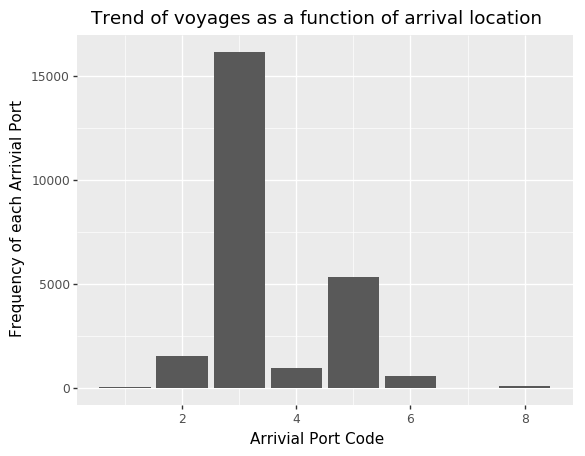

<ggplot: (-9223372036551390250)>

In [26]:
# Part 2
df_tast_6_arr = df_tast_6[df_tast_6['arr_loc'].notna()]  # get arrival data 
arr_loc = df_tast_6_arr['arr_loc'].unique()
print(f'The arrival locations types are: {arr_loc}')

(ggplot(df_tast_6_arr, aes('arr_loc'))
 + geom_bar()
 + labs(x='Arrivial Port Code', y='Frequency of each Arrivial Port')
 + ggtitle('Trend of voyages as a function of arrival location')
)

The departure locations types are: [6. 9.]


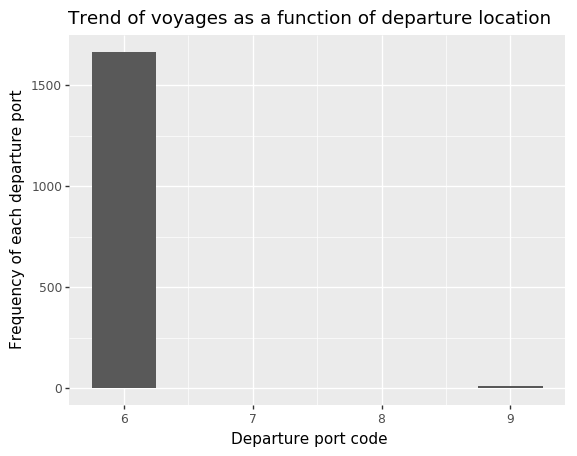

<ggplot: (303635383)>

In [27]:
# Part 3
df_tast_6_dep = df_tast_6[df_tast_6['dep_loc'].notna()]  # get arrival data 
dep_loc = df_tast_6_dep['dep_loc'].unique()
print(f'The departure locations types are: {dep_loc}')

(ggplot(df_tast_6_dep, aes('dep_loc'))
 + geom_histogram(binwidth=0.5)
 + labs(x='Departure port code', y='Frequency of each departure port')
 + ggtitle('Trend of voyages as a function of departure location')
)

**Plot Description**:

**Summary**:

In [28]:
# Part 4
# Adopt previous method 
# First create year variable 
df_tast_6_mencap = df_tast[df_tast['Date_dep'].notna()]
mencap_date_list = df_tast_6_mencap['Date_dep'].tolist()
mencap_year_list = [yr.split('/')[2] for yr in mencap_date_list]
mencap_year_series = pd.Series(map(int, mencap_year_list))  # str to pd.Series
df_tast_6_mencap = df_tast_6_mencap.reset_index(drop=True)
df_tast_6_mencap.loc[:, 'mencap_years'] = mencap_year_series

# Get ratio of captives that are men
men_cap_ratio = df_tast_6_mencap[df_tast_6_mencap['malrat7'].notna()]
men_cap_ratio_plot = men_cap_ratio[['mencap_years', 'malrat7', 'resistance']]  # subselect DataFrame
men_cap_ratio_plot.head()

,mencap_years,malrat7,resistance
330,1824,0.607407,NaN
363,1824,0.675573,NaN
392,1824,0.668122,NaN
464,1828,0.715711,NaN
468,1827,0.446429,NaN


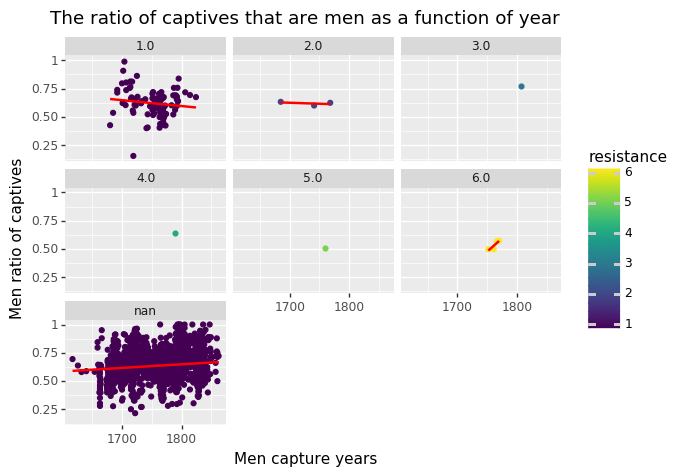

<ggplot: (308834799)>

In [29]:
# Plot the ratio of captives that are men as a function of year
(ggplot(men_cap_ratio_plot, aes('mencap_years', 'malrat7', color='resistance'))
 + facet_wrap('~resistance')  # co-finding variable
 + geom_point()
 + stat_smooth(mapping=aes('mencap_years', 'malrat7'), method='lm', color='red', se = False, inherit_aes=False)
 + labs(x='Men capture years', y='Men ratio of captives')
 + ggtitle('The ratio of captives that are men as a function of year')
)

**Observation Summary**: 

**Part 5**: